## **CART**

#### **Python Libraries**

In [105]:
pip install skompiler


  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54286 sha256=12f9571206a23f8bd4cd1472f80d861051943ef2c31f0c02fc12f97f0facd6fe
  Stored in directory: c:\users\aleynacihangir\appdata\local\pip\cache\wheels\fd\94\33\2a75ac13109534426a0ace0cde02f41aef30a846f1facd4110
Successfully built skompiler


In [106]:
import numpy as np
import pandas as pd 
from termcolor import colored
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler 
from sklearn import model_selection
from sklearn.svm import SVR
from skompiler import skompile
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

#### **Dataset**

In [89]:
hitters = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\Hitters.csv')
df = hitters.copy()
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


#### **Model**

In [92]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])
cart_model = DecisionTreeRegressor(min_samples_split = 2)
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

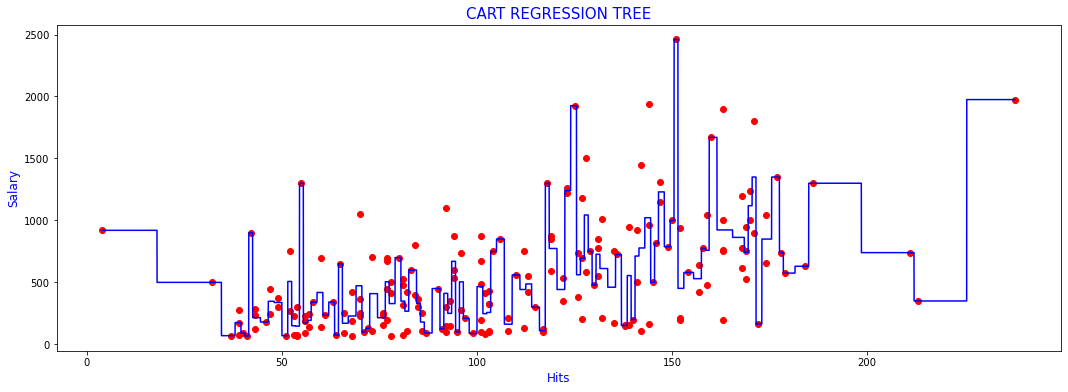

In [103]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.figure(figsize=(18,6))
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESSION TREE', fontsize=15, color="blue")  
plt.xlabel('Hits', fontsize=12, color="blue") 
plt.ylabel('Salary', fontsize=12, color="blue");

#### **Predict**

In [113]:
cart_model.predict(X_test)[0:5]
y_pred =cart_model.predict(X_test)
print(colored("\033[1m" + "RMSE: ", "blue"), np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  468.49579052913884


#### **Model Tuning**

In [118]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print(colored("\033[1m" + "RMSE: ", "blue"), np.sqrt(mean_squared_error(y_test, y_pred))) 
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)

RMSE:  468.49579052913884


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [119]:
print(colored("\033[1m" + "Best Parameters: ", "blue"), cart_cv_model.best_params_) 

Best Parameters:  {'max_leaf_nodes': 9, 'min_samples_split': 76}
